
#  Investigate Train database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
1. This is the HR datasets. In our dataset 50000 rows and 14 columns. Every year, around 5% of its employees have promoted in the company. so, we have the check employee is promoted or not?
2. our variables are :
department,
region,
education,
gender,
recruitment_channel,
nooftrainings,
age previousyearrating,
lengthofservice,
KPIs_met >80%,
awards_won?,
avgtrainingscore,
is_promoted
3. to have a clear answer about <a>(employee is promoted or not? and What factors are important for their pormotions ?)</a>
3. we will answer these question by using different variables and characteristics to excute a clear answer.
5. by making exploration and relations between No show category and different factors.

In [1]:
# Use this cell to set up import statements for all of the packages that
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#check number of rows and columns
df.shape

(54808, 14)

In [4]:
#look at summary of data,data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


there is no  missing or possibly errant data.

In [5]:
#check for duplicated data
df.duplicated().sum()

0

there is no duplicated date

In [6]:
#loot at desctiptive statistics for data
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Employee is promoted or not? and What factors are important for their pormotions ?



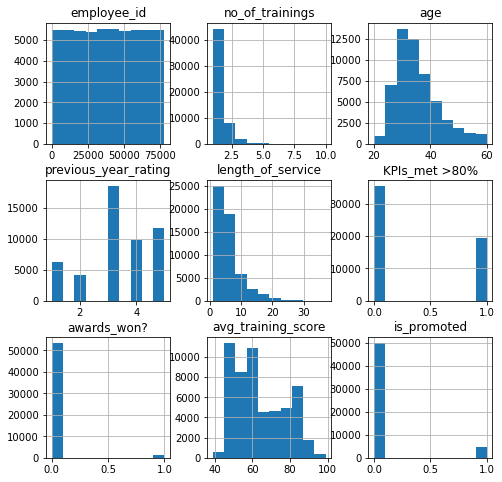

In [7]:
#look at relationship between employees and thiere characteristics
df.hist(figsize=(8,8));

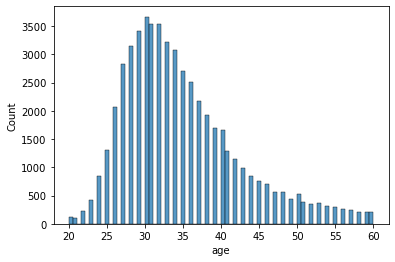

In [56]:
sb.histplot( df['age']);

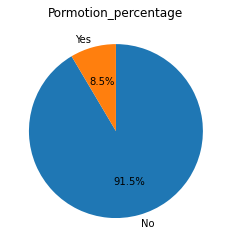

In [9]:
#Explor IS Promoted column by count its values with pie plot.
Pormotion_percentage= df['is_promoted'].value_counts()
plt.pie(Pormotion_percentage, autopct='%.1f%%', labels = ['No', 'Yes'], startangle = 90, counterclock = False);
plt.title('Pormotion_percentage');

1. this visulization explain the number of empolyees who pormoted and not promoted , And this column is important to answer our question.
2. That we will focus on empolyees who promoted.

  gender  is_promoted
0      f     0.089934
1      m     0.083151


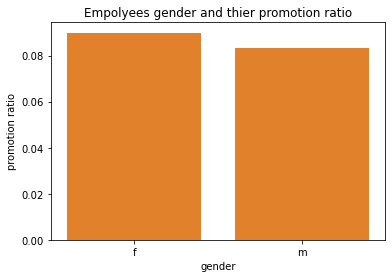

In [10]:
#Explor Empolyees gender and thier promotion ratio
base_color = sb.color_palette()[1]
won = df.groupby('gender')['is_promoted'].mean().reset_index()
sb.barplot(data =won, x= 'gender',y= 'is_promoted',color=base_color);
plt.title('Empolyees gender and thier promotion ratio');
plt.ylabel('promotion ratio');
print(won)

In this observation brove that There is no discrimnation based on gender to promotion

          education  is_promoted
2  Master's & above     0.098559
1   Below Secondary     0.083230
0        Bachelor's     0.082031


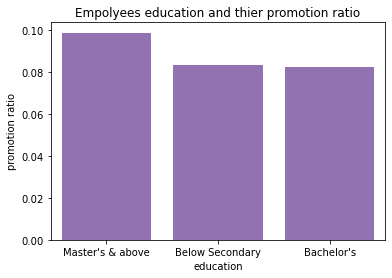

In [14]:
#Explor Empolyees education and thier promotion ratio
base_color = sb.color_palette()[4]
won = df.groupby('education')['is_promoted'].mean().reset_index()
order= won.sort_values(by=['is_promoted'], inplace=True ,ascending=False)
sb.barplot(data =won, x= 'education',y= 'is_promoted',color=base_color, order=order);
plt.title('Empolyees education and thier promotion ratio');
plt.ylabel('promotion ratio')
print(won)

          department  is_promoted
8         Technology     0.107593
5        Procurement     0.096386
0          Analytics     0.095665
4         Operations     0.090148
1            Finance     0.081230
7  Sales & Marketing     0.072031
6                R&D     0.069069
2                 HR     0.056245
3              Legal     0.051011


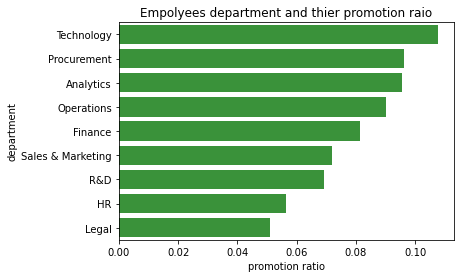

In [12]:
#Explor Empolyees department and thier promotion raio
base_color = sb.color_palette()[2]
won = df.groupby('department')['is_promoted'].mean().reset_index()
order= won.sort_values(by=['is_promoted'], inplace=True ,ascending=False)
sb.barplot(data =won, y= 'department',x= 'is_promoted', order= order, color=base_color);
plt.title('Empolyees department and thier promotion raio');
plt.xlabel('promotion ratio');
print(won)

  recruitment_channel  is_promoted
1            referred     0.120841
2            sourcing     0.085013
0               other     0.083952


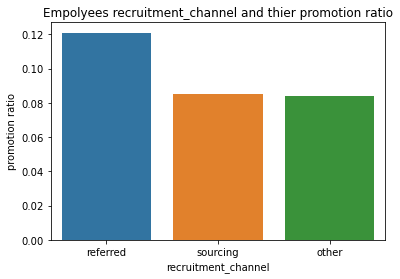

In [13]:
#Explor Empolyees recruitment_channel and thier promotion ratio
won = df.groupby('recruitment_channel')['is_promoted'].mean().reset_index()
order= won.sort_values(by=['is_promoted'], inplace=True ,ascending=False)
sb.barplot(data =won, x= 'recruitment_channel',y= 'is_promoted', order=order);
plt.title('Empolyees recruitment_channel and thier promotion ratio');
plt.ylabel('promotion ratio');
print(won)

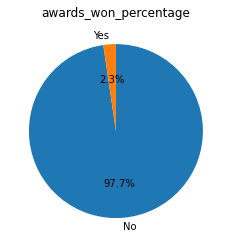

In [16]:
#Explor awards_won_percentage
awards_won_percentage= df['awards_won?'].value_counts()
plt.pie(awards_won_percentage, autopct='%.1f%%', labels = ['No', 'Yes'], startangle = 90, counterclock = False);
plt.title('awards_won_percentage');

   awards_won?  is_promoted
0            0     0.076749
1            1     0.440157


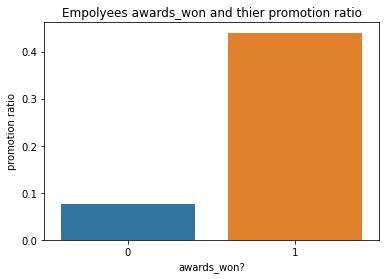

In [50]:
#Explor Empolyees awards_won and thier promotion ratio
won = df.groupby('awards_won?')['is_promoted'].mean().reset_index()
sb.barplot(data =won, x= 'awards_won?',y= 'is_promoted');
plt.title('Empolyees awards_won and thier promotion ratio');
plt.ylabel('promotion ratio');
print(won)

   no_of_trainings  is_promoted
0                1     0.088107
1                2     0.075748
2                3     0.068694
3                4     0.055556
4                5     0.023438
5                6     0.045455
6                7     0.000000
7                8     0.000000
8                9     0.000000
9               10     0.000000


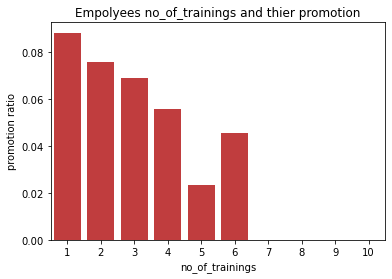

In [46]:
#Explor Empolyees no_of_trainings and thier promotion
base_color = sb.color_palette()[3]
won = df.groupby('no_of_trainings' )['is_promoted'].mean().reset_index()
sb.barplot(data =won, x= 'no_of_trainings',y= 'is_promoted', color=base_color);
plt.title('Empolyees no_of_trainings and thier promotion');
plt.ylabel('promotion ratio');

In [71]:
df.groupby('avg_training_score' )['is_promoted'].mean().reset_index()

,avg_training_score,is_promoted
0,39,0.000000
1,40,0.000000
2,41,0.038462
3,42,0.032258
4,43,0.039773
...,...,...
56,95,1.000000
57,96,0.979167
58,97,1.000000
59,98,1.000000


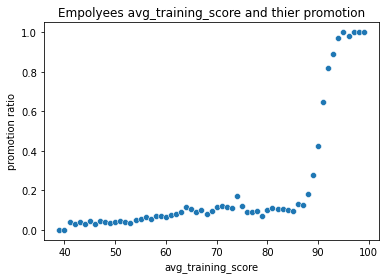

In [44]:
#Explor Empolyees avg_training_score and thier promotion
won = df.groupby('avg_training_score' )['is_promoted'].mean().reset_index()
sb.scatterplot(data =won, x= 'avg_training_score',y= 'is_promoted');
plt.title('Empolyees avg_training_score and thier promotion');
plt.xlabel('avg_training_score');
plt.ylabel('promotion ratio');

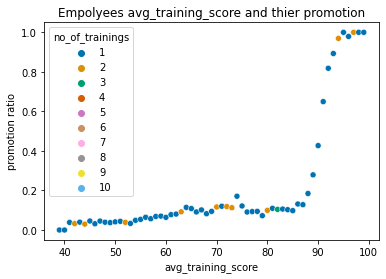

In [45]:
#Explor Empolyees avg_training_score with no_of_trainings and thier promotion
won = df.groupby('avg_training_score' )['is_promoted'].mean().reset_index()
sb.scatterplot(data =won, x= 'avg_training_score',y= 'is_promoted', hue=df['no_of_trainings'], palette = 'colorblind');
plt.title('Empolyees avg_training_score with no_of_trainings and thier promotion');
plt.xlabel('avg_training_score');
plt.ylabel('promotion ratio');

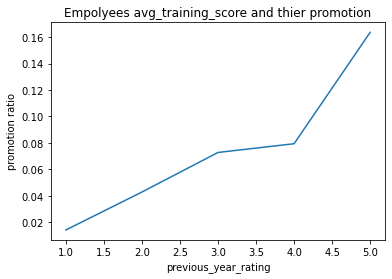

In [47]:
#Explor Empolyees previous_year_rating and thier promotion
won = df.groupby('previous_year_rating' )['is_promoted'].mean().reset_index()
sb.lineplot(data =won, x= 'previous_year_rating',y= 'is_promoted');
plt.title('Empolyees previous_year_rating and thier promotion');
plt.xlabel('previous_year_rating');
plt.ylabel('promotion ratio');

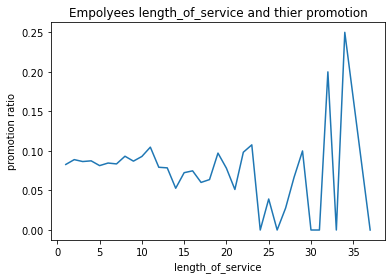

In [55]:
#Explor
won = df.groupby('length_of_service' )['is_promoted'].mean().reset_index()
sb.lineplot(data =won, x= 'length_of_service',y= 'is_promoted');
plt.title('Empolyees length_of_service and thier promotion');
plt.xlabel('length_of_service');
plt.ylabel('promotion ratio');